# **[exercise 1]** Value chain and conversion processes
In this notebook you are prompted to **understand the basics of data science** to examine *time series data* and aggregate it. Furthermore you are required to learn **basic financial mathematics** to evaluate the *profitability of financial assets*.

Furthermore we will cover the following Python basics:
- [x] Matplotlib
- [x] Pandas
- [x] Dictionaries
- [x] Classes

In [11]:
import warnings

# Suppress warnings that packages might be outdated in the future
warnings.simplefilter(action='ignore', category=FutureWarning)

## ENTSOG
The role of the European Network of Transmission System Operators for Gas ([ENTSOG](https://www.entsog.eu/)) is to facilitate and enhance cooperation between national gas transmission system operators (TSOs) across Europe, to ensure the development of a pan-European transmission system in line with European Union energy and climate goals.

The interconnected gas network in Europe:

![ENTSOG map](./figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1.png "ENTSOG map")

If we narrow it down for Germany, we can see the entry points for Greifswald, a station that was used to import gas via the north stream pipeline from Russia.

![ENTSOG Germany map](./figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1_Germany.png "ENTSOG map: Focus Germany")

With the beginning of the Russian war in Ukraine, the European Union has committed themselves to import less gas from Russia. Hereby the gas imports from this pipeline must be replaced. Our work will be to examine new ways for a gas import.

## Task 1 : Data Science <a class="anchor" id="task-1--data-science"></a>
The tasks of a Data Scientist include, for example, developing strategies for data analysis, preparing data for analysis, exploring, analysing and visually preparing data, building models with data using programming languages such as Python. For Energy System Analysis it is of greatest interest as there are large amounts of data that have to be dealt with.

### Task 1.1 : Identify the gas import via the pipeline <a class="anchor" id="#task-11--identify-the-gas-import-via-the-pipeline"></a>

**Task description:** Data regarding the physical gas flows are published on the ENTSO-G transparency platform and can be accessed freely. 
The data can be found via the following link: https://transparency.entsog.eu/#/map \
It is already downloaded in this directory and can be found in the folder `data` \
Read in the data from the attached excel file `export_operationaldata_2023_03_08_140746.xlsx`. Check and examine the data.

In [12]:
import os

# Access to the "data" folder in the current directory
parent_folder = os.path.join(os.getcwd(), "data")

# Accessing the file in the "data" folder
file_path = os.path.join(parent_folder, "export_operationaldata_2023_03_08_140746.xlsx")

For this task we are using [Pandas](https://pandas.pydata.org/) for our Data Analysis. First, we are importing the data via the function ``pd.read_excel()``, have a quick read in the Pandas documentation on [how to import excel sheets](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

<div class="alert alert-block alert-warning">
<b>Reminder:</b> Do not forget to import pandas as a package!
</div>

In [13]:
# BEGIN SOLUTION
import pandas as pd

data = pd.read_excel(io=file_path)
data
# END SOLUTION

indicator periodType        periodFrom          periodTo  \
0     Physical Flow        day  2021-01-01 06:00  2021-01-02 06:00   
1     Physical Flow        day  2021-01-02 06:00  2021-01-03 06:00   
2     Physical Flow        day  2021-01-03 06:00  2021-01-04 06:00   
3     Physical Flow        day  2021-01-04 06:00  2021-01-05 06:00   
4     Physical Flow        day  2021-01-05 06:00  2021-01-06 06:00   
...             ...        ...               ...               ...   
1825  Physical Flow        day  2021-12-28 06:00  2021-12-29 06:00   
1826  Physical Flow        day  2021-12-29 06:00  2021-12-30 06:00   
1827  Physical Flow        day  2021-12-30 06:00  2021-12-31 06:00   
1828  Physical Flow        day  2021-12-31 06:00  2022-01-01 06:00   
1829  Physical Flow        day  2022-01-01 06:00  2022-01-02 06:00   

            tsoEicCode         operatorLabel         pointLabel  \
0     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
1     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
2     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
3     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
4     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
...                ...                   ...                ...   
1825  21X000000001309B                  LBTG  Greifswald / LBTG   
1826  21X000000001309B                  LBTG  Greifswald / LBTG   
1827  21X000000001309B                  LBTG  Greifswald / LBTG   
1828  21X000000001309B                  LBTG  Greifswald / LBTG   
1829  21X000000001309B                  LBTG  Greifswald / LBTG   

     tsoItemIdentifier directionKey   unit  ...  generalRemarks       value  \
0     21Z000000000255M        entry  kWh/d  ...             NaN  1151441931   
1     21Z000000000255M        entry  kWh/d  ...             NaN  1205939117   
2     21Z000000000255M        entry  kWh/d  ...             NaN  1213956982   
3     21Z000000000255M        entry  kWh/d  ...             NaN  1194102178   
4     21Z000000000255M        entry  kWh/d  ...             NaN  1180346596   
...                ...          ...    ...  ...             ...         ...   
1825  21Z000000000241X        entry  kWh/d  ...             NaN   773581601   
1826  21Z000000000241X        entry  kWh/d  ...             NaN   790596630   
1827  21Z000000000241X        entry  kWh/d  ...             NaN   793574659   
1828  21Z000000000241X        entry  kWh/d  ...             NaN   778994276   
1829  21Z000000000241X        entry  kWh/d  ...             NaN   673507724   

      lastUpdateDateTime isUnlimited  flowStatus isCamRelevant isNA  \
0       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
1       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
2       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
3       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
4       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
...                  ...         ...         ...           ...  ...   
1825    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1826    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1827    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1828    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1829    2022-02-10 05:21         NaN   Confirmed           yes  NaN   

      isCmpRelevant interruptionCalculationRemark  isArchived  
0               yes                           NaN           0  
1               yes                           NaN           0  
2               yes                           NaN           0  
3               yes                           NaN           0  
4               yes                           NaN           0  
...             ...                           ...         ...  
1825            yes                           NaN           0  
1826            yes                           NaN 

### Task 1.2 : Describe data by visualization <a class="anchor" id="#task-12--describe-data-by-visualization"></a>

Data is often described as the "new gold or oil of the 21st century". However, it is crucial here that, comparable to oil or gold, the data is not only mined, but also processed accordingly. For this purpose, we use visualisation options, as it is much more accessible to human understanding and thus easier to comprehend.

Let us now explore the data. As we are dealing with time series data, it is best to plot it in a graph to get a first visual expression. This can be achieved using [matplotlib](https://matplotlib.org/) a library that provides visualizations in Python.

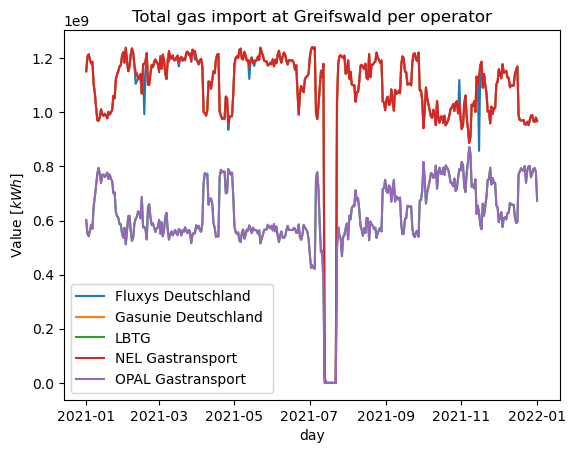

In [14]:
import matplotlib.pyplot as plt

# combine the time columns into a single datetime column
data["datetime"] = pd.to_datetime(data['periodFrom'])

# group by label and plot the values against the datetime column for each group
groups = data.groupby('operatorLabel')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["datetime"], group['value'], label=name)
ax.set_xlabel('day')
ax.set_ylabel('Value [$kWh$]')
ax.legend()
ax.set_title("Total gas import at Greifswald per operator")
plt.show()

Despite we would expect to see a seasonal behaviour, as gas is used for heating in Germany, we cannot see such a clear trend. Maybe there is more to this, when we aggregate over all operators per month.

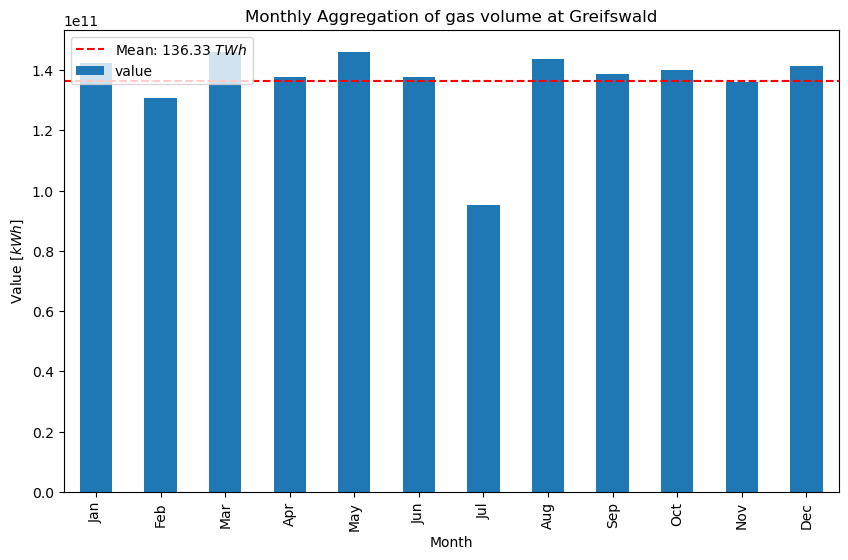

In [15]:
from matplotlib.dates import MonthLocator, DateFormatter

# aggregate data by month for each label
df_month = data.groupby(pd.Grouper(key='datetime', freq='M')).sum()
# remove the last month, as we are interested in all months related to 2021
df_month = df_month.drop(df_month.index[-1])

# plot as bar chart
ax = df_month['value'].plot(kind='bar', figsize=(10,6), legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Value [$kWh$]')
ax.set_title('Monthly Aggregation of gas volume at Greifswald')

# plot mean as horizontal line
mean_val = df_month['value'].mean()
mean_val_label = mean_val/1000/1000/1000
ax.axhline(y=mean_val, color='red', linestyle='--', label=f'Mean: {mean_val_label:.2f} $TWh$')
ax.legend()

# format x-axis labels to show only month names
ax.set_xticklabels(df_month.index.strftime('%b'))

plt.show()

**Task description:** Looking from the value chain for the operation of the gas system, what part do you thing enables that gas can be imported throughout the year?

**SOLUTION:** In general, gas is used for industrial processes as well as space heating. Gas used for space heating is stored in geological storages for the long-term. It is cheaper from the market side and thereby not necessary to buy only for a selected period.

### Task 1.3 : Calculate the total gas import amount <a class="anchor" id="#task-13--calculate total gas import amount"></a>
**Task description:** Identify the unit in which the gas amount is given. Calculate the gas import as the sum over all operator. Give the answer in TWh.

$$ \sum_{i \in \mathcal{O}, t \in T} x_{i,t} $$

<div class="alert alert-block alert-info">
<b>Tip:</b> You can access a Pandas Dataframe column using dataframe["column"], where dataframe is the name of the dataframe object, in this case data and the column is called value. On this object, you could potentially execute the Pandas functon sum(), which is well described in the documentation.
</div>

In [16]:
# BEGIN SOLUTION
all_operator = data["value"].sum()/1000/1000/1000
all_operator
# END SOLUTION

1640.1594341240002

In [17]:
all_operator - 1640.1594 < 1e-1

True

In [18]:
# HIDDEN
all_operator - 1640.1594 < 1e-1

True

<div class="alert alert-block alert-success">
<b>Solution:</b> The unit is given in kWh, which equals to $10^{-9} TWh$. The final gas import as the sum over all operators equals 1640 TWh.
</div>

### Task 1.4 : Calculate the share of a gas transmission system operator <a class="anchor" id="#task-14--calculate share of gas tso"></a>
**Task description:** Calculate the share of the gas transmission system operator Fluxys in the total gas imported via the pipeline into the German market area zone.

$$ \text{share}_{Fluxys} = \frac{\sum_{t \in \mathcal{T}} x_{Fluxys,t}}{\sum_{i \in \mathcal{O}, t \in \mathcal{T}} x_{i,t}} * 100 $$

where $x_{i,t}$ represents the value of gas flow for operator $i$ at time step $t$ given a set of operators $\mathcal{O} := \{ \text{Fluxys}, \text{Gasunie}, \text{LBTG}, \text{NEL}, \text{OPAL} \}$ and time steps $\mathcal{T}$.

<div class="alert alert-block alert-info">
<b>Tip:</b> You can group the data by a Pandas Dataframe column using dataframe.groupby("column"), where dataframe is the name of the dataframe object, in this case data and the column is called operatorLabel. On this object, you could potentially execute the Pandas functon sum(), which is well described in the documentation. Followed by accessing the data from Fluxys with squared brackets, e.g. ["Fluxys Deutschland"].
</div>

In [19]:
# BEGIN SOLUTION
fluxys = data.groupby("operatorLabel")["value"].sum()["Fluxys Deutschland"]/1000/1000/1000
all = data["value"].sum()/1000/1000/1000
share_fluxys = (fluxys / all) * 100
share_fluxys
# END SOLUTION

24.11053684919407

In [20]:
# HIDDEN
share_fluxys - 24.1105 < 1e-1

True

<div class="alert alert-block alert-success">
<b>Solution:</b> The final share is 24.11% for the gas transmission operator Fluxys.
</div>